# Introduction

### Dataset Description
What can we say about the success of a movie before it is released? Are there certain companies that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. 
This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

### Question(s) for Analysis
1: Our first Analysis is to check if all the listed movies in the dataset meets with the runtime requirements for a movie          according to International Movie Standards
1: Which genres are most popular from over the years?
2: Which Production companies are the most popular over the years
2: What kinds of properties are associated with movies that have high revenues?
3: What is the relationship between a movie with High Revenue and its Popularity?


In [170]:
#importing pandas and other libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
#Giving the file name a variable
TMBD = ("tmdb-movies.csv")

In [172]:
#Getting Information about our dataset
df = pd.read_csv(TMBD)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [174]:
#displaying first 10 rows
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [175]:
#displaying the last 20 rows to see how it looks like
df.tail(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10846,17102,tt0059127,0.212716,0,0,Dracula: Prince of Darkness,Christopher Lee|Barbara Shelley|Andrew Keir|Fr...,NaN,Terence Fisher,"DEAD for Ten Years DRACULA, Prince of Darkness...",...,"Whilst vacationing in the Carpathian Mountain,...",90,Horror,Seven Arts Productions|Hammer Film Productions,1/9/66,16,5.7,1966,0.000000e+00,0.000000e+00
10847,28763,tt0060548,0.034555,0,0,Island of Terror,Peter Cushing|Edward Judd|Carole Gray|Eddie By...,NaN,Terence Fisher,How could they stop the devouring death...that...,...,A small island community is overrun with creep...,89,Science Fiction|Horror,Planet Film Productions|Protelco,6/20/66,13,5.3,1966,0.000000e+00,0.000000e+00
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,The science of miniaturization has been unlock...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00
10850,26268,tt0060490,0.202473,0,0,Harper,Paul Newman|Lauren Bacall|Julie Harris|Arthur ...,NaN,Jack Smight,Harper takes a case - and the payoff is murder.,...,Harper is a cynical private eye in the best tr...,121,Action|Drama|Thriller|Crime|Mystery,Warner Bros.,2/23/66,14,6.0,1966,0.000000e+00,0.000000e+00
10851,15347,tt0060182,0.342791,0,0,Born Free,Virginia McKenna|Bill Travers|Geoffrey Keen|Pe...,NaN,James Hill,From The Pages Of The Beloved Best Seller... A...,...,Born Free (1966) is an Open Road Films Ltd./Co...,95,Adventure|Drama|Action|Family|Foreign,High Road,6/22/66,15,6.6,1966,0.000000e+00,0.000000e+00
10852,37301,tt0060165,0.227220,0,0,A Big Hand for the Little Lady,Henry Fonda|Joanne Woodward|Jason Robards|Paul...,NaN,Fielder Cook,All the action you can take...all the adventur...,...,A naive traveler in Laredo gets involved in a ...,95,Western,Eden Productions Inc.,5/31/66,11,6.0,1966,0.000000e+00,0.000000e+00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00
10854,31602,tt0060232,0.146402,0,0,The Chase,Marlon Brando|Jane Fonda|Robert Redford|E.G. M...,NaN,Arthur Penn,The chase is on!,...,Most everyone in town thinks that Sheriff Cald...,135,Thriller|Drama|Crime,Horizon Pictures|Columbia Pictures Corporation,2/17/66,17,6.0,1966,0.000000e+00,0.000000e+00
10855,13343,tt0059221,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,NaN,Alan Rafkin,G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...,...,Luther Heggs aspires to being a reporter for h...,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,0.000000e+00


In [176]:
#Data Cleaning process 
#Checking for missing values in each colums and duplicates for rows
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [177]:
#confirming missing values that has zero and replacing with NaN
df = pd.read_csv(TMBD, na_values='0')
df.head(20)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                5170 non-null   float64
 4   revenue               4850 non-null   float64
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10835 non-null  float64
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [178]:
#dropping columns that do not have real importance to my analysis and questions
df=df.drop(columns = ['homepage', 'imdb_id', 'tagline', 'overview', 'budget_adj', 'revenue_adj'])


In [179]:
#checking for dropped columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                5170 non-null   float64
 3   revenue               4850 non-null   float64
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   runtime               10835 non-null  float64
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
dtypes: float64(5), int6

In [180]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [181]:
#Repacing missing value by getting the box plot for each column and knowing whether to use mean, median or mode
#sns.boxplot(df.budget_adj)
#sns.boxplot(df.revenue_adj)
#we found out that the box plot was skewed which means we are going with the median for replacing NaN Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                5170 non-null   float64
 3   revenue               4850 non-null   float64
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   runtime               10835 non-null  float64
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
dtypes: float64(5), int6

In [182]:
median = df['budget'].median()


In [183]:
df['budget'].fillna(median, inplace = True)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  float64
 3   revenue               4850 non-null   float64
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   runtime               10835 non-null  float64
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
dtypes: float64(5), int6

In [185]:
median = df['revenue'].median()

In [186]:
df['revenue'].fillna(median, inplace = True)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  float64
 3   revenue               10866 non-null  float64
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   runtime               10835 non-null  float64
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
dtypes: float64(5), int6

In [188]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [189]:
sum(df.duplicated())

1

In [190]:
df.drop_duplicates(inplace = True)

In [191]:
sum(df.duplicated())

0

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  float64
 3   revenue               10865 non-null  float64
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   keywords              9372 non-null   object 
 8   runtime               10834 non-null  float64
 9   genres                10842 non-null  object 
 10  production_companies  9835 non-null   object 
 11  release_date          10865 non-null  object 
 12  vote_count            10865 non-null  int64  
 13  vote_average          10865 non-null  float64
 14  release_year          10865 non-null  int64  
dtypes: float64(5), int6

In [193]:
#Getting an overall stats on our dataframe df
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10834.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,2.353657e+07,5.744940e+07,102.363855,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,2.769628e+07,1.119707e+08,30.948225,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,1.700000e+07,3.182654e+07,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.700000e+07,3.182654e+07,112.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [194]:
#filling missing values for runtime with mean 
mean = df['runtime'].mean()

In [195]:
df['runtime'].fillna(mean, inplace = True)

In [196]:
#checking for filled/missing values on important columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  float64
 3   revenue               10865 non-null  float64
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   keywords              9372 non-null   object 
 8   runtime               10865 non-null  float64
 9   genres                10842 non-null  object 
 10  production_companies  9835 non-null   object 
 11  release_date          10865 non-null  object 
 12  vote_count            10865 non-null  int64  
 13  vote_average          10865 non-null  float64
 14  release_year          10865 non-null  int64  
dtypes: float64(5), int6

In [197]:
#gettin the overall statistics once again after filling missing values for runtime 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,2.353657e+07,5.744940e+07,102.363855,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,2.769628e+07,1.119707e+08,30.904039,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,1.700000e+07,3.182654e+07,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.700000e+07,3.182654e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


# Exploratory Data Analysis 

## 1. 
#### Our first Analysis is to check if all the listed movies in the dataset meets with the runtime requirements for a movie according to IMDB Standards.



In [198]:
df=df[df['runtime']>40]
df

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,17000000.0,3.182654e+07,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95.0,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,20379,0.065543,17000000.0,3.182654e+07,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176.0,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,39768,0.065141,17000000.0,3.182654e+07,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94.0,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,21449,0.064317,17000000.0,3.182654e+07,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80.0,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [164]:
df=df[df['runtime']<40]
df

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


From This analysis we see that all our Movie Data set Meets the minimum runtime requirements of a movie.

In [199]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10645.000000,10645.000000,1.064500e+04,1.064500e+04,10645.000000,10645.000000,10645.000000,10645.000000
mean,65278.232504,0.651916,2.370131e+07,5.798521e+07,104.194014,220.760075,5.957915,2001.248380
std,91710.291894,1.005696,2.794486e+07,1.130586e+08,28.415659,580.979859,0.930576,12.817077
min,5.000000,0.000065,1.000000e+00,2.000000e+00,41.000000,10.000000,1.500000,1960.000000
25%,10530.000000,0.209790,1.700000e+07,3.182654e+07,90.000000,17.000000,5.400000,1994.000000
50%,20200.000000,0.385797,1.700000e+07,3.182654e+07,99.000000,39.000000,6.000000,2006.000000
75%,73873.000000,0.720101,1.700000e+07,3.182654e+07,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


## 2.
#### Plot an histogram Distribution of the runtime of the movies in this TMDB Datasets

Text(0, 0.5, 'No of Movies')

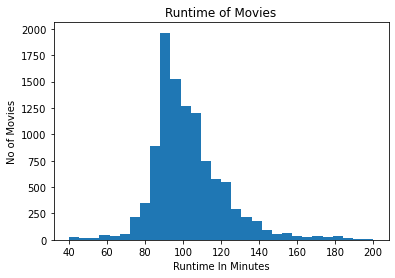

In [200]:
plt.hist(df['runtime'], range=(40,200), bins = 30)
plt.title('Runtime of Movies')
plt.xlabel('Runtime In Minutes')
plt.ylabel('No of Movies')



This shows that the majority of movies have meanruntime of 85 - 110 MINUTES


## 3.
#### Now we look at the longest and shortest movies from the dataset

In [201]:
#This shows that the majority of movies have meanruntime of 85 - 110 MINUTES

#Now we look at the longest and shortest movies from the dataset
df.info()


print(df.original_title[df.runtime == df.runtime.max()])
print(df.runtime[df.runtime == df.runtime.max()])
 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10645 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10645 non-null  int64  
 1   popularity            10645 non-null  float64
 2   budget                10645 non-null  float64
 3   revenue               10645 non-null  float64
 4   original_title        10645 non-null  object 
 5   cast                  10596 non-null  object 
 6   director              10608 non-null  object 
 7   keywords              9224 non-null   object 
 8   runtime               10645 non-null  float64
 9   genres                10627 non-null  object 
 10  production_companies  9670 non-null   object 
 11  release_date          10645 non-null  object 
 12  vote_count            10645 non-null  int64  
 13  vote_average          10645 non-null  float64
 14  release_year          10645 non-null  int64  
dtypes: float64(5), int6

In [202]:
print(df.original_title[df.runtime == df.runtime.min()])
print(df.runtime[df.runtime == df.runtime.min()])

1029    Marvel: 75 Years, From Pulp to Pop!
1750                          Hulk vs. Thor
1752                       Under the Sea 3D
4874          Amy Schumer: Mostly Sex Stuff
6691                            Deep Sea 3D
Name: original_title, dtype: object
1029    41.0
1750    41.0
1752    41.0
4874    41.0
6691    41.0
Name: runtime, dtype: float64


####  We can see this from our  analysis:

##### longest runtime is 900 MINUTES and the movie is 
                  The story of the film: Odyssey
##### The shortest movies has the runtime of 41 minutes
              Marvel:75 Years, From Pulp to Pop!
                                   Hulk vs. Thor
                                Under the Sea 3D
                   Amy Schumer: Mostly Sex Stuff
                                     Deep Sea 3D




## 4. 
#### We look forward to calculate the most popular genre over the years 
     we give it a variable name dg  and use separator attributes

In [203]:
dg=df['genres'].str.get_dummies(sep='|')

Source file https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html the get_dummies converts categorical variables to indicator variables and each of the strings are splitted and returned as a dataframe of indicator variables

In [204]:

dgG = dg.sum().reset_index()

Ploting graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Documentary'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Foreign'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Romance'),
  Text(15, 0, 'Science Fiction'),
  Text(16, 0, 'TV Movie'),
  Text(17, 0, 'Thriller'),
  Text(18, 0, 'War'),
  Text(19, 0, 'Western')])

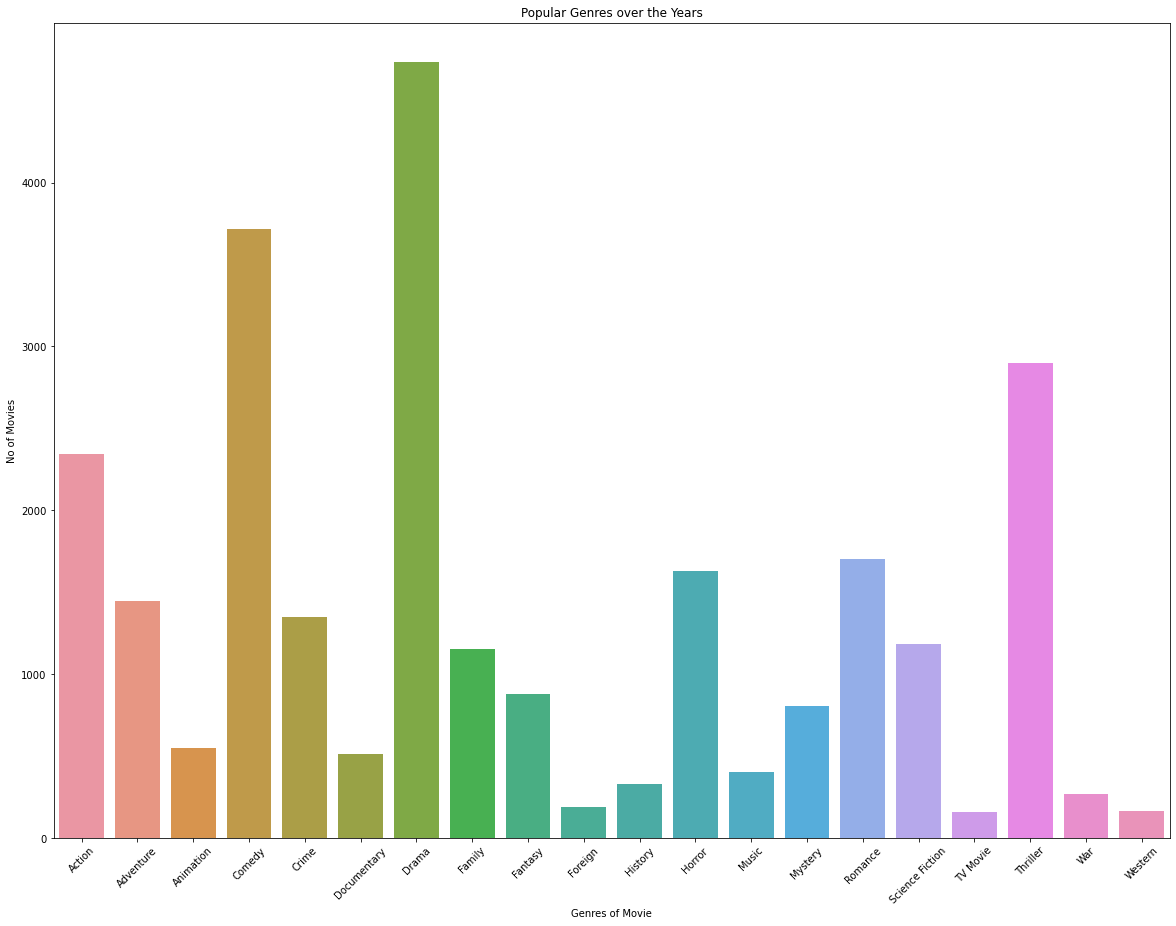

In [205]:
plt.figure(figsize=(20, 15))
sns.barplot(x=dg.columns, y=dg.sum(), data = dgG)
plt.title('Popular Genres over the Years')
plt.xlabel('Genres of Movie')
plt.ylabel('No of Movies')
plt.xticks(rotation = 45)

The most popular Genre of Movies over the years has been Drama, Comedy, Thriller and Action.

-To Calculate the Profit We Do simple Calculation of Budget of the Movie from Revenue Generated to get the Profit Therein

                    id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000   -0.011722 -0.091758 -0.073290 -0.058826   -0.033929   
popularity   -0.011722    1.000000  0.509296  0.644790  0.133416    0.803479   
budget       -0.091758    0.509296  1.000000  0.707989  0.164670    0.608926   
revenue      -0.073290    0.644790  0.707989  1.000000  0.145920    0.778391   
runtime      -0.058826    0.133416  0.164670  0.145920  1.000000    0.160457   
vote_count   -0.033929    0.803479  0.608926  0.778391  0.160457    1.000000   
vote_average -0.072079    0.219056  0.079119  0.163491  0.231574    0.262421   
release_year  0.511487    0.092328  0.133782  0.065622 -0.105300    0.110610   
profit       -0.060016    0.615350  0.546465  0.978341  0.124774    0.744580   

              vote_average  release_year    profit  
id               -0.072079      0.511487 -0.060016  
popularity        0.219056      0.092328  0.615350  
budget            0.079119      0.133782

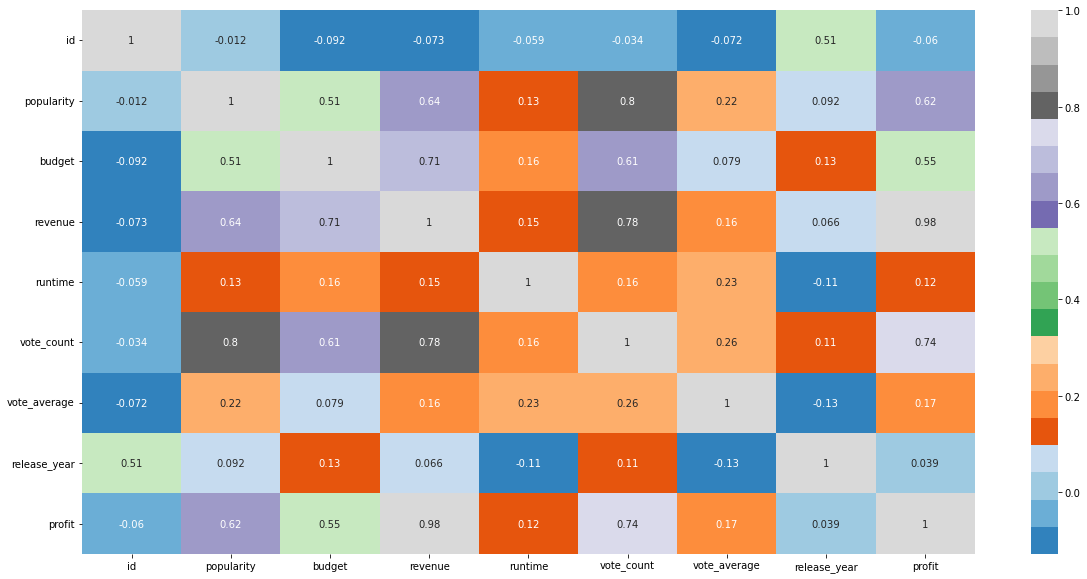

In [84]:
sum_column = df['revenue'] - df['budget']
sum_column = df['profit'] 

plt.figure(figsize=(20, 10))
print(df.corr()) 
dfplot = sns.heatmap(df.corr(), cmap = 'tab20c', annot = True)


## 5.
#### We want to find out the Movie Title with the highest and lowest profit generated

-This code shows the Movie Title with the Highest Profit Generation

In [211]:
print(df.original_title[sum_column==sum_column.max()])

1386    Avatar
Name: original_title, dtype: object


-This code shows the Movie Title with the lowest profit generated

In [212]:
print(df.original_title[sum_column==sum_column.min()])

2244    The Warrior's Way
Name: original_title, dtype: object


---- Most Profitable Movies according to Profit Generated 



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Star Wars: The Force Awakens'),
  Text(2, 0, 'Titanic'),
  Text(3, 0, 'Jurassic World'),
  Text(4, 0, 'Furious 7'),
  Text(5, 0, 'The Avengers'),
  Text(6, 0, 'Harry Potter and the Deathly Hallows: Part 2'),
  Text(7, 0, 'Avengers: Age of Ultron'),
  Text(8, 0, 'Frozen'),
  Text(9, 0, 'The Net'),
  Text(10, 0, 'Minions'),
  Text(11, 0, 'The Lord of the Rings: The Return of the King'),
  Text(12, 0, 'Iron Man 3'),
  Text(13, 0, 'Transformers: Dark of the Moon'),
  Text(14, 0, 'Skyfall'),
  Text(15, 0, 'Despicable Me 2'),
  Text(16, 0, "Pirates of the Caribbean: Dead Man's Chest"),
  Text(17, 0, 'Toy Story 3'),
  Text(18, 0, 'Jurassic Park'),
  Text(19, 0, "Harry Potter and the Philosopher's Stone")])

<Figure size 1440x2880 with 0 Axes>

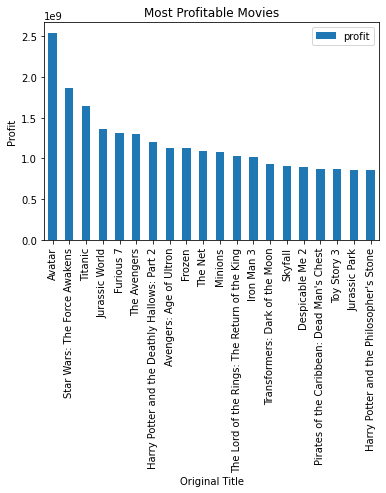

In [216]:
plt.figure(figsize=(20, 40))
ds.plot(x= 'original_title', y= 'profit', kind= 'bar');
plt.xlabel('Original Title')
plt.ylabel('Profit')
plt.title('Most Profitable Movies')
plt.xticks(rotation = 90)

## 6. 
#### Most Popular Production Companies Over the Years

In [218]:
dp= df['production_companies'].str.get_dummies(sep='|')
dp

,"""DIA"" Productions GmbH & Co. KG",# Lexyn Productions,10 West Studios,100 Feet Productions,1019 Entertainment,108 Media,10th Hole Productions,11:11 Mediaworks,12 Gauge Productions,120dB Films,...,platinum studios,teamWorx Produktion fÃ¼r Kino und Fernsehen GmbH,the filmgroup,thefyzz,thinkfilm,uFilm,uFund,verture Films,Ã–sterreichischer Rundfunk (ORF),í”„ë¡œë•ì…˜M
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
dp.sum()

"DIA" Productions GmbH & Co. KG      1
# Lexyn Productions                  1
10 West Studios                      1
100 Feet Productions                 1
1019 Entertainment                   1
                                    ..
uFilm                               11
uFund                                1
verture Films                        1
Ã–sterreichischer Rundfunk (ORF)     1
í”„ë¡œë•ì…˜M                         1
Length: 7841, dtype: int64

Source file https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html the get_dummies converts categorical variables to indicator variables and each of the strings are splitted and returned as a dataframe of indicator variables

In [220]:
dg1= dp.sum().reset_index()
dg1

,index,0
0,"""DIA"" Productions GmbH & Co. KG",1
1,# Lexyn Productions,1
2,10 West Studios,1
3,100 Feet Productions,1
4,1019 Entertainment,1
...,...,...
7836,uFilm,11
7837,uFund,1
7838,verture Films,1
7839,Ã–sterreichischer Rundfunk (ORF),1


In [221]:
dp.columns

Index(['"DIA" Productions GmbH & Co. KG', '# Lexyn Productions',
       '10 West Studios', '100 Feet Productions', '1019 Entertainment',
       '108 Media', '10th Hole Productions', '11:11 Mediaworks',
       '12 Gauge Productions', '120dB Films',
       ...
       'platinum studios', 'teamWorx Produktion fÃ¼r Kino und Fernsehen GmbH',
       'the filmgroup', 'thefyzz', 'thinkfilm', 'uFilm', 'uFund',
       'verture Films', 'Ã–sterreichischer Rundfunk (ORF)', 'í”„ë¡œë•ì…˜M'],
      dtype='object', length=7841)

We used the reset_index() in pandas to reset index of this dataframe 'dp' that was separated by (|) to default indexing so that the original index gets converted to a column

(array([   0,    1,    2, ..., 7838, 7839, 7840]),
 [Text(0, 0, '"DIA" Productions GmbH & Co. KG'),
  Text(1, 0, '# Lexyn Productions'),
  Text(2, 0, '10 West Studios'),
  Text(3, 0, '100 Feet Productions'),
  Text(4, 0, '1019 Entertainment'),
  Text(5, 0, '108 Media'),
  Text(6, 0, '10th Hole Productions'),
  Text(7, 0, '11:11 Mediaworks'),
  Text(8, 0, '12 Gauge Productions'),
  Text(9, 0, '120dB Films'),
  Text(10, 0, '13 Ghosts Productions Canada Inc.'),
  Text(11, 0, '1492 Pictures'),
  Text(12, 0, '1600 Limited Partnership'),
  Text(13, 0, '1812 Productions'),
  Text(14, 0, '1818'),
  Text(15, 0, '1821 Pictures'),
  Text(16, 0, '185 Trax'),
  Text(17, 0, '1976 Productions'),
  Text(18, 0, '1984 Private Defense Contractors'),
  Text(19, 0, '1992 Number Four Limited Partnership'),
  Text(20, 0, '2 Bridges Productions'),
  Text(21, 0, '2 Entertain'),
  Text(22, 0, '2 Entertain Video'),
  Text(23, 0, '2 Loop Films'),
  Text(24, 0, '2 Player Productions'),
  Text(25, 0, '2 Wolves Film

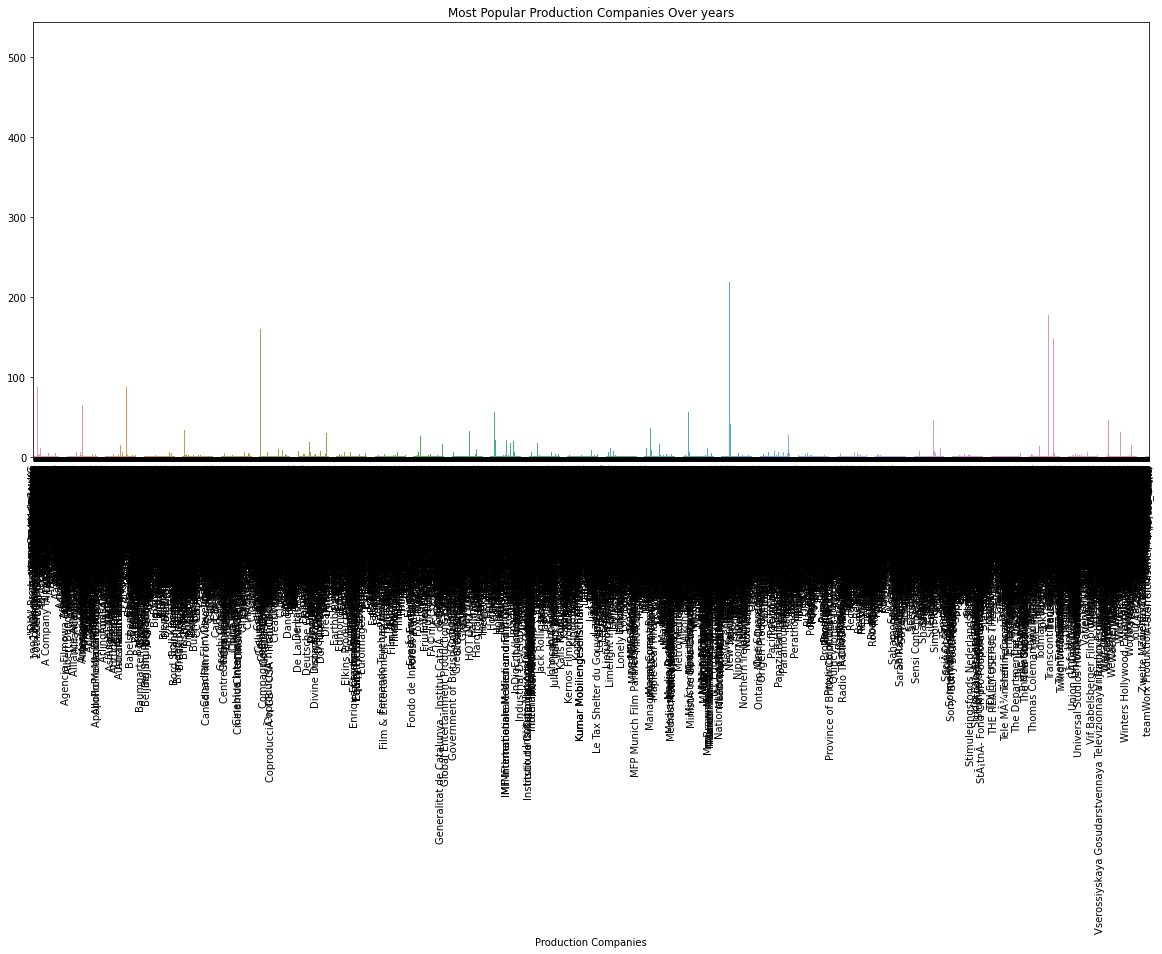

In [228]:
plt.figure(figsize=(20, 8))
sns.barplot(x=dp.columns, y=dp.sum(), data=dg1)
plt.xlabel('Production Companies')
plt.title('Most Popular Production Companies Over years')
plt.xticks(rotation = 90)

## 7.
#### We want to deduce if Popularity has an effect on the Revenue and Profit of a Movie 

In [184]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'profit'],
      dtype='object')

In [211]:
df['revenue'].max()

2781505847

In [212]:
[df['revenue'].max()==df['revenue']]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 10861    False
 10862    False
 10863    False
 10864    False
 10865    False
 Name: revenue, Length: 10614, dtype: bool]

In [215]:
df[df['revenue'].max()==df['revenue']]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2544505847


In [216]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'profit'],
      dtype='object')

In [68]:
top15_HRM_Dir = df.nlargest(15, 'popularity')[['original_title', 'popularity', 'director']].set_index('original_title')
top15_HRM_Dir

,popularity,director
original_title,,
Jurassic World,32.985763,Colin Trevorrow
Mad Max: Fury Road,28.419936,George Miller
Interstellar,24.949134,Christopher Nolan
Guardians of the Galaxy,14.311205,James Gunn
Insurgent,13.112507,Robert Schwentke
Captain America: The Winter Soldier,12.971027,Joe Russo|Anthony Russo
Star Wars,12.037933,George Lucas
John Wick,11.422751,Chad Stahelski|David Leitch
Star Wars: The Force Awakens,11.173104,J.J. Abrams


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Jurassic World'),
  Text(1, 0, 'Mad Max: Fury Road'),
  Text(2, 0, 'Interstellar'),
  Text(3, 0, 'Guardians of the Galaxy'),
  Text(4, 0, 'Insurgent'),
  Text(5, 0, 'Captain America: The Winter Soldier'),
  Text(6, 0, 'Star Wars'),
  Text(7, 0, 'John Wick'),
  Text(8, 0, 'Star Wars: The Force Awakens'),
  Text(9, 0, 'The Hunger Games: Mockingjay - Part 1'),
  Text(10, 0, 'The Hobbit: The Battle of the Five Armies'),
  Text(11, 0, 'Avatar'),
  Text(12, 0, 'Inception'),
  Text(13, 0, 'Furious 7'),
  Text(14, 0, 'The Revenant')])

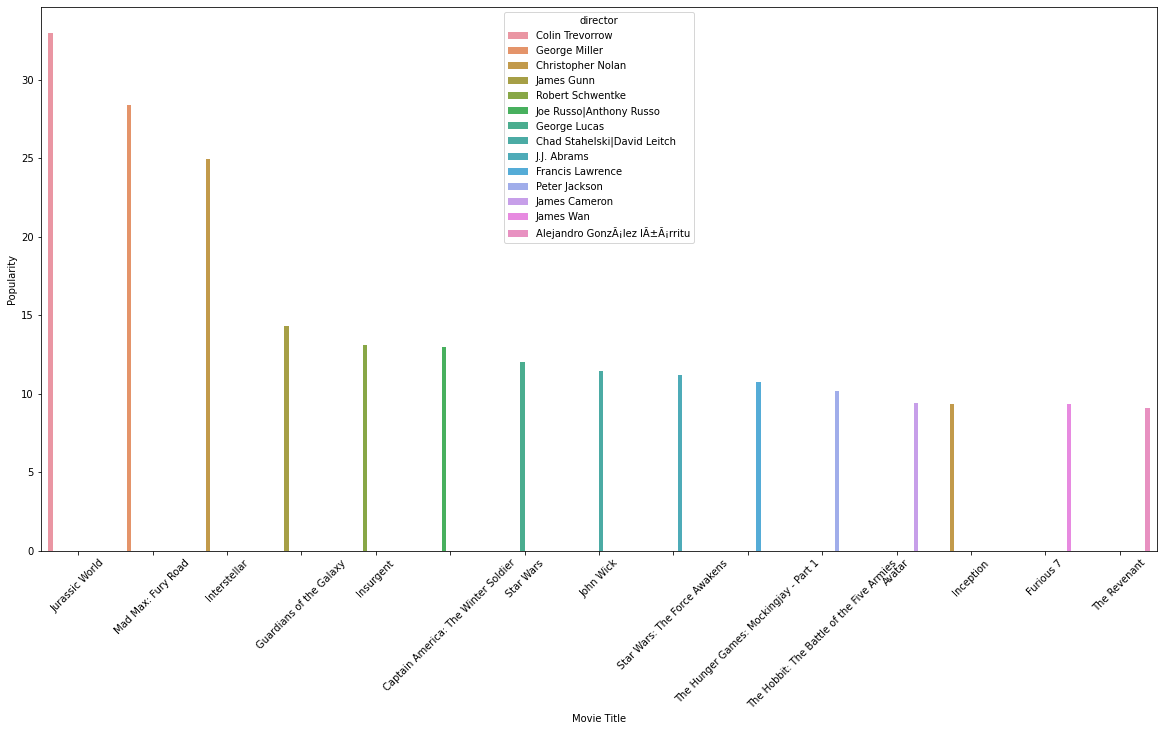

In [227]:
plt.figure(figsize = (20,10))
sns.barplot(x= top15_HRM_Dir.index, y='popularity', data =top15_HRM_Dir , hue='director')
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.xticks(rotation = 45)



#we can deduce that Avatar which is the movie with the highest revenue is amongst the top 15 movies with popularity


Does Popularity affect Revenue and Profit 

We Are Going to be starting first with the Popularity against Revenue 


In [57]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'profit'],
      dtype='object')

<AxesSubplot:xlabel='popularity', ylabel='revenue'>

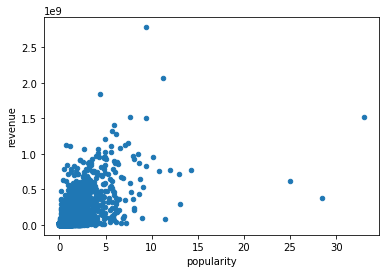

In [66]:
df.plot(x='popularity', y='revenue', kind ='scatter')


We can say that Popularity Does Not Neccessarily affect The Revenue Generation of a particular Movie 

In [59]:
df.columns


Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'profit'],
      dtype='object')

Now we are Going to Find out If Popularity of a movie affects its Profit Generation

<AxesSubplot:xlabel='popularity', ylabel='profit'>

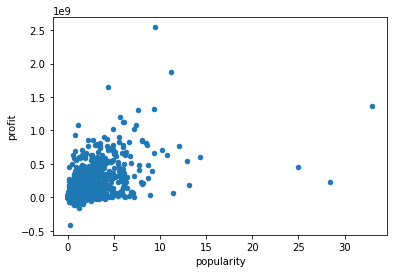

In [65]:
df.plot(x='popularity', y='profit', kind ='scatter')

We can see again that Popularity Does not have major effect on the Profit and Revenue Generated as stated Earlier


## Conclusions

#### 1. From This analysis we see that all our Movie Data set Meets the minimum runtime requirements of a movie.

#### 2. This shows that the majority of movies have A runtime of 85 - 110 MINUTES

#### 3. longest runtime is 900 MINUTES and the movie is
          The story of the film: Odyssey
          
   The shortest movies has the runtime of 41 minutes
          Marvel:75 Years, From Pulp to Pop!
                               Hulk vs. Thor
                            Under the Sea 3D
               Amy Schumer: Mostly Sex Stuff
                                 Deep Sea 3D

#### 4. From Our Analysis So far we see that the Most Popular Genres of Movie over the years has been Drama, Comedy, Thriller and      Action. 
#### 5. Avatar and The warriors way are the Highest and Lowest Profit Generating Movies from the dataset. These are the Top 15      Movies with High Profit Generation in Descending order
   a.Avatar
   b.Star Wars: The Force Awakens
   c.Titanic
   d.Jurassic World
   e.Furious 7
   f.The Avengers
   g.Harry Potter and the Deathly Hallows: Part 2
   h.Avengers: Age of Ultron
   i.Frozen
   j.The Net
   k.Minions
   l.The Lord of the Rings: The Return of the King
   m.Iron Man 3
   n.'Transformers: Dark of the Moon
   0.Skyfall
   p.Despicable Me 2
   q.Pirates of the Caribbean: Dead Man's Chest
   r.Toy Story 3
   s.Jurassic Park
   t.Harry Potter and the Philosopher's Stone
#### 6. We can see that Popularity Does not have major effect on the Profit and Revenue Generated as stated Earlier